In [1]:
% matplotlib inline

In [2]:
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
from scipy.stats import binom
import collections
from scipy.stats import norm

sns.set(style="whitegrid")

## Length of string beans 

#### Generating story:
I bought a bag of string beans from a grocery store this weekend. I assume that the length of the beans could be modeled by normal distribution as human height (technically log-normal distribution since the length can't be negative. But as human height, I won't transform the length of string beans).

I randomly measured 53 beans from the bag and recorded their length in centimeters.

In [3]:
beans = pd.read_csv("length.csv")

In [4]:
beans["length"].describe()

count    53.000000
mean     11.884906
std       1.487822
min       8.300000
25%      11.100000
50%      12.100000
75%      13.000000
max      14.400000
Name: length, dtype: float64

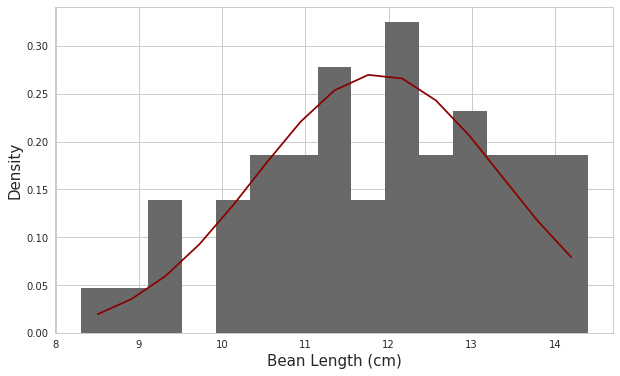

In [5]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
n, bins, patches = axes.hist(beans[ "length"], density=True, color="dimgray", bins=15)
axes.set_ylabel( "Density", fontsize=15)
axes.set_xlabel( "Bean Length (cm)", fontsize=15)

xs = [(b2 + b1)/2 for b1, b2 in zip(bins, bins[1:])]    

mean = np.mean(beans["length"])
std  = np.std(beans["length"])
ys = [norm.pdf( k, loc=mean, scale=std) for k in xs]
axes.plot(xs, ys, color="darkred")

plt.show()
plt.close()

The lengths of the 53 samples of string beans don't fit a normal distribution very well. The data has a long tail on the short length side and is bulky on the long length side. The distribution is skewed to the left. The normal distribution also overestimated the number of beans around the mean. 

As shown in descriptive statistics, mean is 11.88 and standard deviation is 1.49.

## Distribution of blue M&Ms

#### Generating story:
I bought a bag of dark chocolate M&Ms from Target. If I treat this bag of candy as a population, the proportion of each color can be known by simply counting them. Then I can simulate a series of Bernoulli trials using this bag of M&Ms. Suppose my color of interest is blue. After mixing the bag really well, I randomly take out a candy, record its color, then put it back into the bag. I repeat this action for 19 more times and then count how many times of these 20 times the candy I took out were blue. The probability of the candy being blue should follow Binomial distribution because binomial distribution is the distribution of the probability of observing k successes in n independent trials with a probability p of success.

#### Experiment procedures:
1. Count each color:

In [6]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [7]:
colors = pd.read_csv("colors.csv")
colors

,color,count,proportion
0,blue,102,0.302
1,orange,92,0.272
2,red,51,0.151
3,green,45,0.133
4,brown,38,0.112
5,yellow,10,0.030


Blue and orange are the most popular colors in this bag. I picked blue as the color of interest for this experiment. 

2. Bernoulli trials.

20 independent drawings were performed as described above and The number of times a blue candy was drawn was counted. This process was repeated 30 times and the results(30 counts of blue) was recorded in "blues.csv"

In [8]:
blues = pd.read_csv("blues.csv")
blues

,blues
0,6
1,9
2,4
3,5
4,7
5,5
6,8
7,5
8,7
9,7


3. Plot the data. Theoretically, possible counts of blue candy in each 20 drawings range from 0 to 20. I padded the proportion of the missing counts with 0.

In [9]:
counts = blues["blues"].value_counts().sort_index()
for i in range(0, 21):
    if i not in counts:
        counts[i] = 0
print (len(counts))

21


In [10]:
proportions = blues["blues"].value_counts(normalize=True).sort_index()
for i in range(0, 21):
    if i not in proportions:
        proportions[i] = 0
proportions = list(collections.OrderedDict(sorted(proportions.items())).values())

Plot the experimental data in a bar chart and put the reference binomial distribution on top of the bar chart

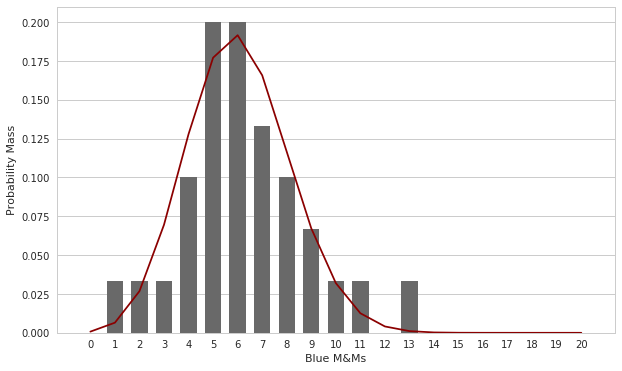

In [11]:
x = range(len(counts))
width = 1/1.5

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.bar(x, proportions, width, color="dimgray", align="center")
axes.set_xlabel("Blue M&Ms")
axes.set_xticks(x)
#axes.set_xticklabels(proportions.axes[0])
axes.set_ylabel( "Probability Mass")
axes.xaxis.grid(False) 

n = 20
p = 0.302
ys = [binom.pmf( k, n, p) for k in range( 0, n + 1)]
axes.plot(x, ys, color="darkred")

plt.show()
plt.close()

My data generally conforms to the binomial distribution. In order to confirm that binomial distribution is a good model for this experiment, I would need to repeat this experiments to gather more data.

4. Estimate the parameters. 

In [12]:
mean = n* p
variance = n*p*(1-p)
print ("Mean is {0:.2f}".format(mean))
print ("Variance is {0:.2f}".format(variance))

Mean is 6.04
Variance is 4.22
